# NATURAL LANGUGAE PROCESSING - CYCLE 4 OF AI LEARNING AND CERTIFICATION PROGRAMME.

Dev: *Tejaswini *J

Cohort - **GER/GAR3**

Kaggle Competition/ Project: (https://www.kaggle.com/competitions/nlp-getting-started)

*Twitter*, now known as "*X*" is a large community with a lot of users passing information, but it's not always clear whether a person’s words are actually announcing a disaster.



> In this project, I have used a simple ANN classifier to identify whether the tweet is a disaster tweet or not.

# Python Code:

1.   Data Cleaning and visualization using Word Cloud
2.   Vectorization of Text Data to generate a feature matrix.
3.   ANN with different layers and activation functions



In [23]:
#import the necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Load the Data set, clean and visualize the data.

In [26]:
# Load the dataset (train.csv)
train_df = pd.read_csv("/content/train.csv")

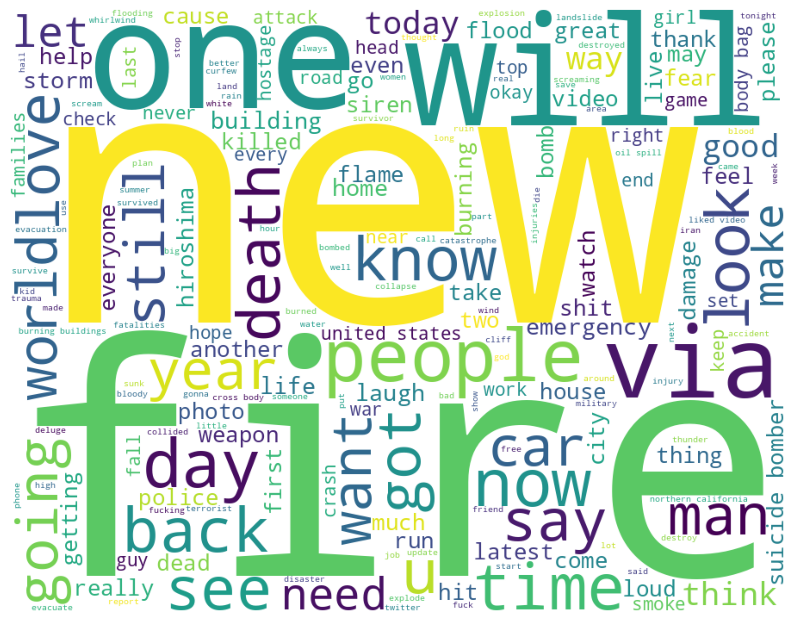

In [14]:
# Preprocess the data (lowercase, remove URLs, etc.)
def data_clean(x: str):
    # Remove URLs
    x = re.sub("http[^ ]+", "", x)

    # Remove known token characeters
    x = re.sub(r"&amp;", "", x)
    x = re.sub(r"RT", "", x)
    x = re.sub(r"\dth", "", x)
    x = re.sub(r"@[^ ]+", "", x)

    # Set all to lower case
    x = x.lower()

    # Expand contractions
    contractions_rev_mapping = {
        " i am ": [r"\Wim\W"],
        " okay ": [r"\Wok\W"],
        " united states ": [r"u\.s\.?"],
        " you too ": [r"\Wu2\W"],
        " you ": [r"\Wu\W"],
        "laugh out loud": [r"lol"],
        "with ": [r"w/"],
        " have": [r"'ve"],
        "can not": [r"can't"],
        " not": [r"n't"],
        " am": [r"'m"],
        " are": [r"'re"],
        " to ": [r"\W2\W"],
        " season": [r" s\d+"],
        " episode": [r" e\d+"],
        " positive": [r" +ve"],
        " negative": [r" -ve"]
    }
    for e,cs in contractions_rev_mapping.items():
        for c in cs:
            x = re.sub(c, e, x)

    # Remove number endings [eg: 1st, 23rd, 1920s]
    x = re.sub(r"\d[a-z]+", "", x)

    # Swap out alternative seperators
    x = re.sub(r"\.", " ", x)
    x = re.sub(r";", " ", x)
    x = re.sub(r":", " ", x)

    # Remove all non standard english text characters
    x = re.sub(r"[^a-z\s']", " ", x.lower())
    x = re.sub(r"\W'", " ", x.lower())
    x = re.sub(r"'\W", " ", x.lower())

    # Single character words
    while re.search(r" \w ", x):
        x = re.sub(r" \w ", " ", x)

    # Cleanup gaps of more than 1 space
    x = re.sub(r" {2,}", " ", x.lower())
    return x

# Apply preprocessing to the "text" column
train_df["text"] = train_df["text"].apply(data_clean)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english",max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

#Plot the words to see if the data is clean and weightage of these words.
wordcloud=WordCloud(background_color="white",width=900,height=700)
text_cloud=wordcloud.generate(" ".join(train_df["text"]))
plt.figure(figsize=(10,10))
plt.imshow(text_cloud)
plt.axis("off")
plt.show()

In [15]:
# Print the first few preprocessed texts
print("Sample preprocessed texts:\n")
for i in range(5):
    print(f"{i+1}. {X_train.iloc[i]}")

# Print the shape of the TF-IDF matrices
print(f"\n\tX_train_tfidf shape: {X_train_tfidf.shape}")
print(f"\n\tX_val_tfidf shape:   {X_val_tfidf.shape}")

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Convert data to PyTorch tensors
X_train_tfidf = torch.tensor(X_train_tfidf.toarray(), dtype=torch.float32)
X_val_tfidf = torch.tensor(X_val_tfidf.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

Sample preprocessed texts:

1. courageous and honest analysis of need to use atomic bomb in hiroshima japanese military refused surrender 
2.  wld shame if that golf cart became engulfed in flames boycottbears
3. tell to rescind medals of honor given to us soldiers at the massacre of wounded knee sign now 
4. worried about how the ca drought might affect you extreme weather does it dampen our economy 
5.  lava blast power red pantherattack 

	X_train_tfidf shape: (6090, 2022)

	X_val_tfidf shape:   (1523, 2022)


Epoch [100/10000], Loss: 0.7075099945068359
Epoch [200/10000], Loss: 0.705794095993042
Epoch [300/10000], Loss: 0.7038469314575195
Epoch [400/10000], Loss: 0.7011750936508179
Epoch [500/10000], Loss: 0.6979601979255676
Epoch [600/10000], Loss: 0.6940672397613525
Epoch [700/10000], Loss: 0.6891005039215088
Epoch [800/10000], Loss: 0.6827394366264343
Epoch [900/10000], Loss: 0.6743232011795044
Epoch [1000/10000], Loss: 0.6644783616065979
Epoch [1100/10000], Loss: 0.6544945240020752
Epoch [1200/10000], Loss: 0.6437098979949951
Epoch [1300/10000], Loss: 0.6316314339637756
Epoch [1400/10000], Loss: 0.6181212663650513
Epoch [1500/10000], Loss: 0.6030595302581787
Epoch [1600/10000], Loss: 0.5854484438896179
Epoch [1700/10000], Loss: 0.5650570392608643
Epoch [1800/10000], Loss: 0.5420795679092407
Epoch [1900/10000], Loss: 0.5153711438179016
Epoch [2000/10000], Loss: 0.4851398169994354
Epoch [2100/10000], Loss: 0.45404568314552307
Epoch [2200/10000], Loss: 0.42273691296577454
Epoch [2300/10000]

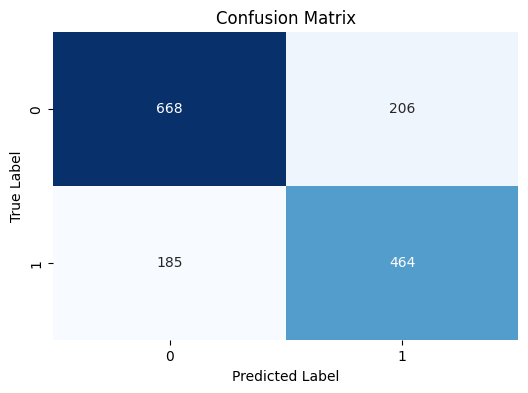

In [17]:
# Define the neural network
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc0 = nn.Linear(input_size, 128)
        self.fc1 = nn.Linear(128, 96)
        self.fc2 = nn.Linear(96, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc0(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

# Initialize the model
input_size = X_train_tfidf.shape[1]
model = ANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Train the model
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tfidf)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:  # Print loss every 100 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")

# Evaluate the model
with torch.no_grad():
    val_outputs = model(X_val_tfidf)
    val_preds = (val_outputs >= 0.5).float()
    val_f1 = f1_score(y_val, val_preds)
    print(f"Validation F1 Score: {val_f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_val, val_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Let's test the trained model

In [19]:
test_df = pd.read_csv("/content/test.csv")

In [20]:
test_df["text"] = test_df["text"].apply(data_clean)
X_test_tfidf = vectorizer.transform(test_df["text"])
X_test_tfidf = torch.tensor(X_test_tfidf.toarray(), dtype=torch.float32)

In [22]:
with torch.no_grad():
    test_outputs = model(X_test_tfidf)
    test_preds = (test_outputs >= 0.5).float()

test_df["target"] = test_preds.numpy()
test_df.to_csv("cleaner_test_predictions.csv", index=False)
print("Predictions saved to cleaner_test_predictions.csv")

Predictions saved to cleaner_test_predictions.csv


Let's train the model with different Activation functions and apply a 5-Cross Fold Validation:

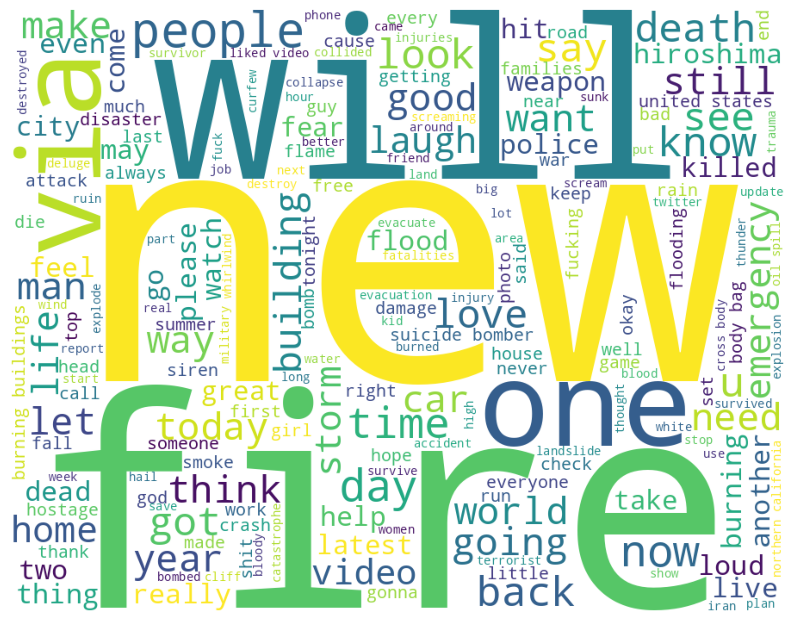

In [27]:
#Clean & preprocess the data:

# Apply preprocessing to the "text" column
train_df["text"] = train_df["text"].apply(data_clean)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english",max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

#Plot the words to see if the data is clean and weightage of these words.
wordcloud=WordCloud(background_color="white",width=900,height=700)
text_cloud=wordcloud.generate(" ".join(train_df["text"]))
plt.figure(figsize=(10,10))
plt.imshow(text_cloud)
plt.axis("off")
plt.show()

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Convert data to PyTorch tensors
X_train_tfidf = torch.tensor(X_train_tfidf.toarray(), dtype=torch.float32)
X_val_tfidf = torch.tensor(X_val_tfidf.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

Training with relu activation function
Fold [1], Epoch [100/3000], Loss: 0.6737712025642395
Fold [1], Epoch [200/3000], Loss: 0.5275442600250244
Fold [1], Epoch [300/3000], Loss: 0.17064568400382996
Fold [1], Epoch [400/3000], Loss: 0.07523443549871445
Fold [1], Epoch [500/3000], Loss: 0.04456857219338417
Fold [1], Epoch [600/3000], Loss: 0.034504398703575134
Fold [1], Epoch [700/3000], Loss: 0.03091692551970482
Fold [1], Epoch [800/3000], Loss: 0.02859988436102867
Fold [1], Epoch [900/3000], Loss: 0.027497196570038795
Fold [1], Epoch [1000/3000], Loss: 0.026899365708231926
Fold [1], Epoch [1100/3000], Loss: 0.026504237204790115
Fold [1], Epoch [1200/3000], Loss: 0.026228465139865875
Fold [1], Epoch [1300/3000], Loss: 0.026022406294941902
Fold [1], Epoch [1400/3000], Loss: 0.025862889364361763
Fold [1], Epoch [1500/3000], Loss: 0.025736341252923012
Fold [1], Epoch [1600/3000], Loss: 0.0256330743432045
Fold [1], Epoch [1700/3000], Loss: 0.025546079501509666
Fold [1], Epoch [1800/3000], 

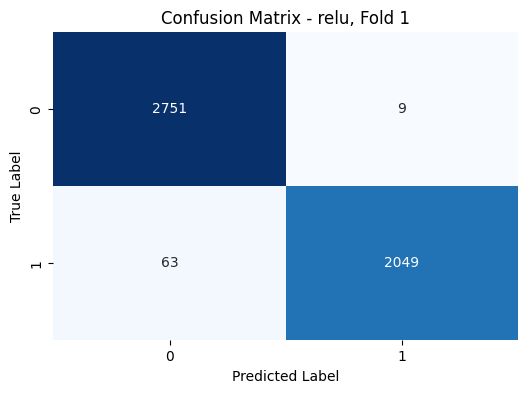

Fold [2], Epoch [100/3000], Loss: 0.6723888516426086
Fold [2], Epoch [200/3000], Loss: 0.541856586933136
Fold [2], Epoch [300/3000], Loss: 0.1977260559797287
Fold [2], Epoch [400/3000], Loss: 0.07719067484140396
Fold [2], Epoch [500/3000], Loss: 0.04283543676137924
Fold [2], Epoch [600/3000], Loss: 0.03164226934313774
Fold [2], Epoch [700/3000], Loss: 0.02765013836324215
Fold [2], Epoch [800/3000], Loss: 0.025929633527994156
Fold [2], Epoch [900/3000], Loss: 0.02450038678944111
Fold [2], Epoch [1000/3000], Loss: 0.023842183873057365
Fold [2], Epoch [1100/3000], Loss: 0.023495245724916458
Fold [2], Epoch [1200/3000], Loss: 0.02327796444296837
Fold [2], Epoch [1300/3000], Loss: 0.023130686953663826
Fold [2], Epoch [1400/3000], Loss: 0.023025495931506157
Fold [2], Epoch [1500/3000], Loss: 0.02294744737446308
Fold [2], Epoch [1600/3000], Loss: 0.022887952625751495
Fold [2], Epoch [1700/3000], Loss: 0.022841596975922585
Fold [2], Epoch [1800/3000], Loss: 0.022804897278547287
Fold [2], Epoch

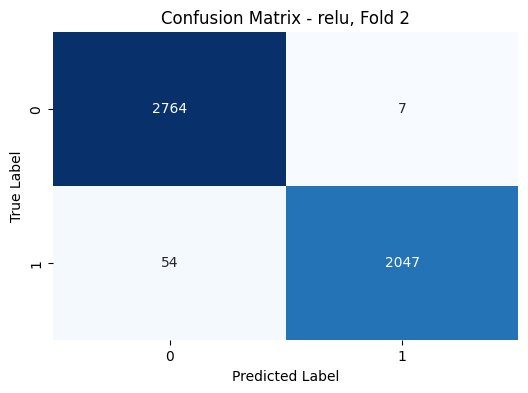

Fold [3], Epoch [100/3000], Loss: 0.6570799350738525
Fold [3], Epoch [200/3000], Loss: 0.4758734703063965
Fold [3], Epoch [300/3000], Loss: 0.18004274368286133
Fold [3], Epoch [400/3000], Loss: 0.06622469425201416
Fold [3], Epoch [500/3000], Loss: 0.0421205535531044
Fold [3], Epoch [600/3000], Loss: 0.03234172984957695
Fold [3], Epoch [700/3000], Loss: 0.026930371299386024
Fold [3], Epoch [800/3000], Loss: 0.024768492206931114
Fold [3], Epoch [900/3000], Loss: 0.023852095007896423
Fold [3], Epoch [1000/3000], Loss: 0.02330348826944828
Fold [3], Epoch [1100/3000], Loss: 0.022971509024500847
Fold [3], Epoch [1200/3000], Loss: 0.022750357165932655
Fold [3], Epoch [1300/3000], Loss: 0.022588705644011497
Fold [3], Epoch [1400/3000], Loss: 0.022456606850028038
Fold [3], Epoch [1500/3000], Loss: 0.022331945598125458
Fold [3], Epoch [1600/3000], Loss: 0.022239847108721733
Fold [3], Epoch [1700/3000], Loss: 0.022162046283483505
Fold [3], Epoch [1800/3000], Loss: 0.022084180265665054
Fold [3], E

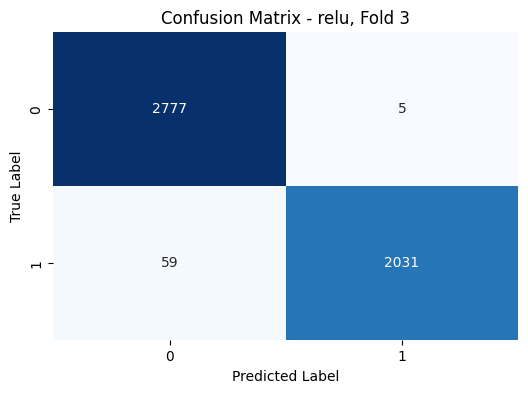

Fold [4], Epoch [100/3000], Loss: 0.684044361114502
Fold [4], Epoch [200/3000], Loss: 0.500105619430542
Fold [4], Epoch [300/3000], Loss: 0.20123670995235443
Fold [4], Epoch [400/3000], Loss: 0.07755632698535919
Fold [4], Epoch [500/3000], Loss: 0.042186930775642395
Fold [4], Epoch [600/3000], Loss: 0.031264495104551315
Fold [4], Epoch [700/3000], Loss: 0.027483657002449036
Fold [4], Epoch [800/3000], Loss: 0.02510017156600952
Fold [4], Epoch [900/3000], Loss: 0.02342038042843342
Fold [4], Epoch [1000/3000], Loss: 0.022740663960576057
Fold [4], Epoch [1100/3000], Loss: 0.022368863224983215
Fold [4], Epoch [1200/3000], Loss: 0.022115744650363922
Fold [4], Epoch [1300/3000], Loss: 0.021918989717960358
Fold [4], Epoch [1400/3000], Loss: 0.02180364541709423
Fold [4], Epoch [1500/3000], Loss: 0.021730495616793633
Fold [4], Epoch [1600/3000], Loss: 0.02167995646595955
Fold [4], Epoch [1700/3000], Loss: 0.021642984822392464
Fold [4], Epoch [1800/3000], Loss: 0.021615536883473396
Fold [4], Epo

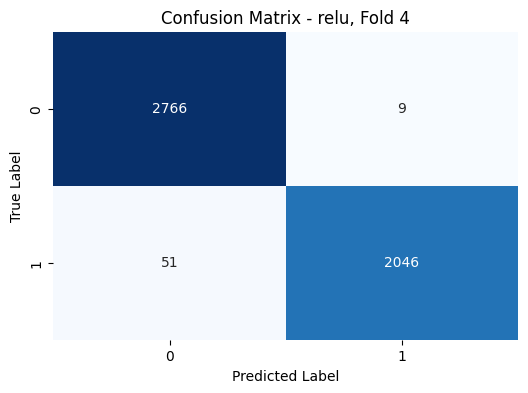

Fold [5], Epoch [100/3000], Loss: 0.6714583039283752
Fold [5], Epoch [200/3000], Loss: 0.4963110387325287
Fold [5], Epoch [300/3000], Loss: 0.18720319867134094
Fold [5], Epoch [400/3000], Loss: 0.07351025193929672
Fold [5], Epoch [500/3000], Loss: 0.043431542813777924
Fold [5], Epoch [600/3000], Loss: 0.03304702416062355
Fold [5], Epoch [700/3000], Loss: 0.029106687754392624
Fold [5], Epoch [800/3000], Loss: 0.02698400989174843
Fold [5], Epoch [900/3000], Loss: 0.025854799896478653
Fold [5], Epoch [1000/3000], Loss: 0.02531132847070694
Fold [5], Epoch [1100/3000], Loss: 0.024943454191088676
Fold [5], Epoch [1200/3000], Loss: 0.02466888725757599
Fold [5], Epoch [1300/3000], Loss: 0.02448267675936222
Fold [5], Epoch [1400/3000], Loss: 0.024355363100767136
Fold [5], Epoch [1500/3000], Loss: 0.024265019223093987
Fold [5], Epoch [1600/3000], Loss: 0.024198871105909348
Fold [5], Epoch [1700/3000], Loss: 0.0241490937769413
Fold [5], Epoch [1800/3000], Loss: 0.024110985919833183
Fold [5], Epoc

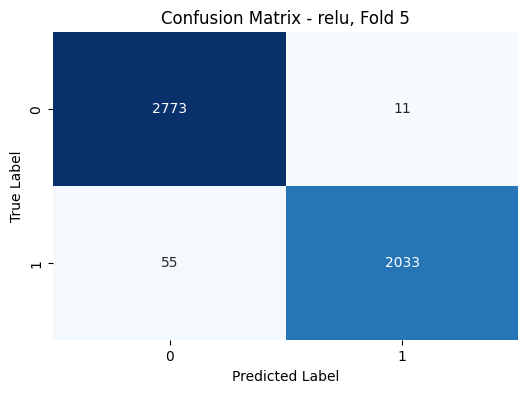

Training with tanh activation function
Fold [1], Epoch [100/3000], Loss: 0.547131359577179
Fold [1], Epoch [200/3000], Loss: 0.19939370453357697
Fold [1], Epoch [300/3000], Loss: 0.09323616325855255
Fold [1], Epoch [400/3000], Loss: 0.05990525335073471
Fold [1], Epoch [500/3000], Loss: 0.04791852459311485
Fold [1], Epoch [600/3000], Loss: 0.041555553674697876
Fold [1], Epoch [700/3000], Loss: 0.038470134139060974
Fold [1], Epoch [800/3000], Loss: 0.03587419539690018
Fold [1], Epoch [900/3000], Loss: 0.03442685306072235
Fold [1], Epoch [1000/3000], Loss: 0.03335617482662201
Fold [1], Epoch [1100/3000], Loss: 0.032525718212127686
Fold [1], Epoch [1200/3000], Loss: 0.03185969963669777
Fold [1], Epoch [1300/3000], Loss: 0.0313120111823082
Fold [1], Epoch [1400/3000], Loss: 0.030852820724248886
Fold [1], Epoch [1500/3000], Loss: 0.030462967231869698
Fold [1], Epoch [1600/3000], Loss: 0.030130665749311447
Fold [1], Epoch [1700/3000], Loss: 0.02984362654387951
Fold [1], Epoch [1800/3000], Los

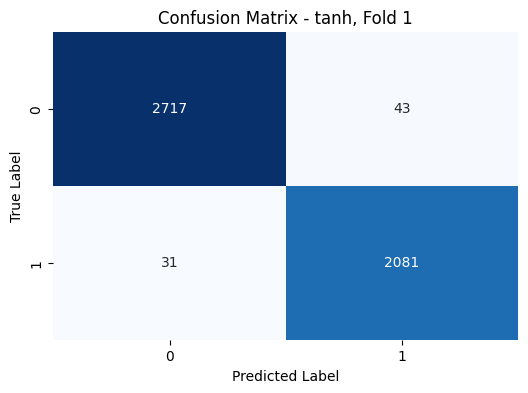

Fold [2], Epoch [100/3000], Loss: 0.49427270889282227
Fold [2], Epoch [200/3000], Loss: 0.17082761228084564
Fold [2], Epoch [300/3000], Loss: 0.07722926139831543
Fold [2], Epoch [400/3000], Loss: 0.05106338858604431
Fold [2], Epoch [500/3000], Loss: 0.041870977729558945
Fold [2], Epoch [600/3000], Loss: 0.03674742951989174
Fold [2], Epoch [700/3000], Loss: 0.0340435691177845
Fold [2], Epoch [800/3000], Loss: 0.032280974090099335
Fold [2], Epoch [900/3000], Loss: 0.031034275889396667
Fold [2], Epoch [1000/3000], Loss: 0.0301054660230875
Fold [2], Epoch [1100/3000], Loss: 0.029387623071670532
Fold [2], Epoch [1200/3000], Loss: 0.028816821053624153
Fold [2], Epoch [1300/3000], Loss: 0.028353188186883926
Fold [2], Epoch [1400/3000], Loss: 0.027970820665359497
Fold [2], Epoch [1500/3000], Loss: 0.027648117393255234
Fold [2], Epoch [1600/3000], Loss: 0.02737455815076828
Fold [2], Epoch [1700/3000], Loss: 0.027128752321004868
Fold [2], Epoch [1800/3000], Loss: 0.026359591633081436
Fold [2], E

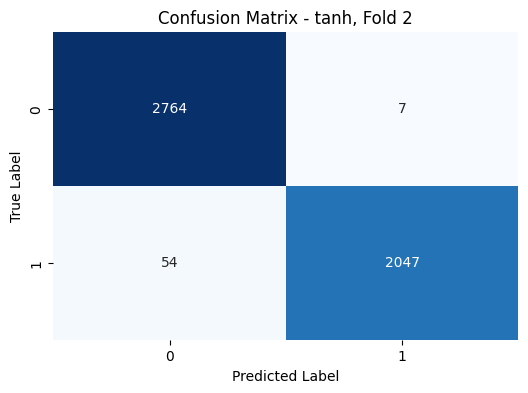

Fold [3], Epoch [100/3000], Loss: 0.5468711256980896
Fold [3], Epoch [200/3000], Loss: 0.20207791030406952
Fold [3], Epoch [300/3000], Loss: 0.09372130781412125
Fold [3], Epoch [400/3000], Loss: 0.0606779083609581
Fold [3], Epoch [500/3000], Loss: 0.04849769547581673
Fold [3], Epoch [600/3000], Loss: 0.042901910841464996
Fold [3], Epoch [700/3000], Loss: 0.03973501920700073
Fold [3], Epoch [800/3000], Loss: 0.037639591842889786
Fold [3], Epoch [900/3000], Loss: 0.036145199090242386
Fold [3], Epoch [1000/3000], Loss: 0.03502512350678444
Fold [3], Epoch [1100/3000], Loss: 0.03415448218584061
Fold [3], Epoch [1200/3000], Loss: 0.03345898166298866
Fold [3], Epoch [1300/3000], Loss: 0.03287222236394882
Fold [3], Epoch [1400/3000], Loss: 0.031796008348464966
Fold [3], Epoch [1500/3000], Loss: 0.03135724738240242
Fold [3], Epoch [1600/3000], Loss: 0.0309992004185915
Fold [3], Epoch [1700/3000], Loss: 0.03069913573563099
Fold [3], Epoch [1800/3000], Loss: 0.03044889122247696
Fold [3], Epoch [1

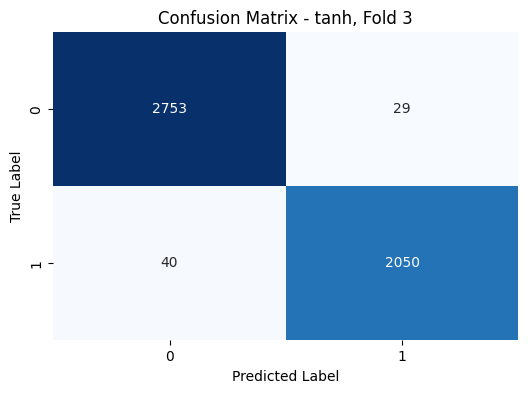

Fold [4], Epoch [100/3000], Loss: 0.5947006940841675
Fold [4], Epoch [200/3000], Loss: 0.22357776761054993
Fold [4], Epoch [300/3000], Loss: 0.10082294791936874
Fold [4], Epoch [400/3000], Loss: 0.0645119771361351
Fold [4], Epoch [500/3000], Loss: 0.050441890954971313
Fold [4], Epoch [600/3000], Loss: 0.04435430467128754
Fold [4], Epoch [700/3000], Loss: 0.04054071009159088
Fold [4], Epoch [800/3000], Loss: 0.038541484624147415
Fold [4], Epoch [900/3000], Loss: 0.0371633842587471
Fold [4], Epoch [1000/3000], Loss: 0.036147795617580414
Fold [4], Epoch [1100/3000], Loss: 0.035365521907806396
Fold [4], Epoch [1200/3000], Loss: 0.03374598175287247
Fold [4], Epoch [1300/3000], Loss: 0.033183883875608444
Fold [4], Epoch [1400/3000], Loss: 0.03273990377783775
Fold [4], Epoch [1500/3000], Loss: 0.032372813671827316
Fold [4], Epoch [1600/3000], Loss: 0.032065995037555695
Fold [4], Epoch [1700/3000], Loss: 0.03180760145187378
Fold [4], Epoch [1800/3000], Loss: 0.03158878535032272
Fold [4], Epoch

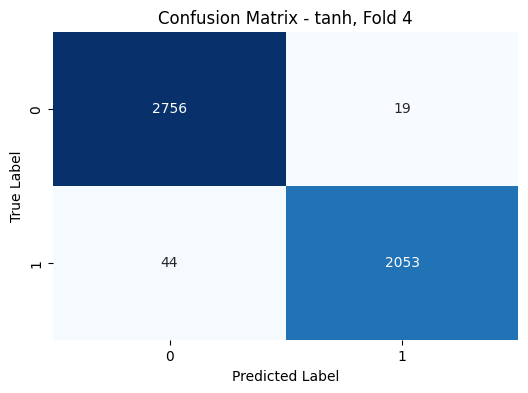

Fold [5], Epoch [100/3000], Loss: 0.6124498248100281
Fold [5], Epoch [200/3000], Loss: 0.24879613518714905
Fold [5], Epoch [300/3000], Loss: 0.11751898378133774
Fold [5], Epoch [400/3000], Loss: 0.07595455646514893
Fold [5], Epoch [500/3000], Loss: 0.06113989278674126
Fold [5], Epoch [600/3000], Loss: 0.053017232567071915
Fold [5], Epoch [700/3000], Loss: 0.04819770157337189
Fold [5], Epoch [800/3000], Loss: 0.04559256508946419
Fold [5], Epoch [900/3000], Loss: 0.04376879706978798
Fold [5], Epoch [1000/3000], Loss: 0.041546013206243515
Fold [5], Epoch [1100/3000], Loss: 0.04046952351927757
Fold [5], Epoch [1200/3000], Loss: 0.039639268070459366
Fold [5], Epoch [1300/3000], Loss: 0.03898172080516815
Fold [5], Epoch [1400/3000], Loss: 0.03845232352614403
Fold [5], Epoch [1500/3000], Loss: 0.038020841777324677
Fold [5], Epoch [1600/3000], Loss: 0.0376657098531723
Fold [5], Epoch [1700/3000], Loss: 0.03737110644578934
Fold [5], Epoch [1800/3000], Loss: 0.03712515905499458
Fold [5], Epoch [

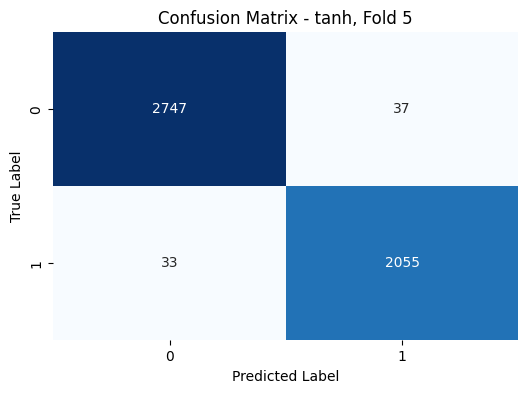

Training with sigmoid activation function
Fold [1], Epoch [100/3000], Loss: 0.6842544078826904
Fold [1], Epoch [200/3000], Loss: 0.6841683983802795
Fold [1], Epoch [300/3000], Loss: 0.6831299066543579
Fold [1], Epoch [400/3000], Loss: 0.6590412855148315
Fold [1], Epoch [500/3000], Loss: 0.5082041621208191
Fold [1], Epoch [600/3000], Loss: 0.35845690965652466
Fold [1], Epoch [700/3000], Loss: 0.27096912264823914
Fold [1], Epoch [800/3000], Loss: 0.21115648746490479
Fold [1], Epoch [900/3000], Loss: 0.16847121715545654
Fold [1], Epoch [1000/3000], Loss: 0.1381450593471527
Fold [1], Epoch [1100/3000], Loss: 0.11619718372821808
Fold [1], Epoch [1200/3000], Loss: 0.10030003637075424
Fold [1], Epoch [1300/3000], Loss: 0.0891176387667656
Fold [1], Epoch [1400/3000], Loss: 0.0811631828546524
Fold [1], Epoch [1500/3000], Loss: 0.07520115375518799
Fold [1], Epoch [1600/3000], Loss: 0.07058808207511902
Fold [1], Epoch [1700/3000], Loss: 0.06701532006263733
Fold [1], Epoch [1800/3000], Loss: 0.064

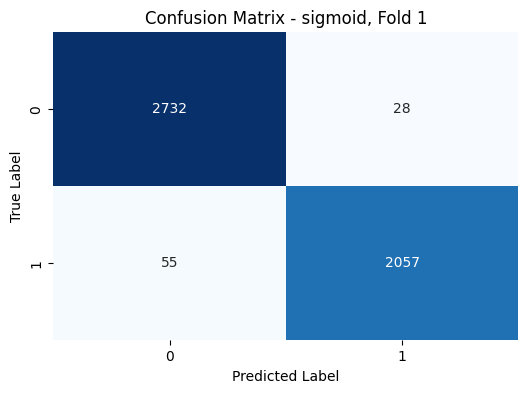

Fold [2], Epoch [100/3000], Loss: 0.6836465001106262
Fold [2], Epoch [200/3000], Loss: 0.6836079955101013
Fold [2], Epoch [300/3000], Loss: 0.6833987236022949
Fold [2], Epoch [400/3000], Loss: 0.6805376410484314
Fold [2], Epoch [500/3000], Loss: 0.6220113039016724
Fold [2], Epoch [600/3000], Loss: 0.42757922410964966
Fold [2], Epoch [700/3000], Loss: 0.3006719648838043
Fold [2], Epoch [800/3000], Loss: 0.22543339431285858
Fold [2], Epoch [900/3000], Loss: 0.17398454248905182
Fold [2], Epoch [1000/3000], Loss: 0.1377212405204773
Fold [2], Epoch [1100/3000], Loss: 0.11300210654735565
Fold [2], Epoch [1200/3000], Loss: 0.09613019227981567
Fold [2], Epoch [1300/3000], Loss: 0.08356489986181259
Fold [2], Epoch [1400/3000], Loss: 0.07463832944631577
Fold [2], Epoch [1500/3000], Loss: 0.06799205392599106
Fold [2], Epoch [1600/3000], Loss: 0.06354185193777084
Fold [2], Epoch [1700/3000], Loss: 0.059728141874074936
Fold [2], Epoch [1800/3000], Loss: 0.05622284859418869
Fold [2], Epoch [1900/300

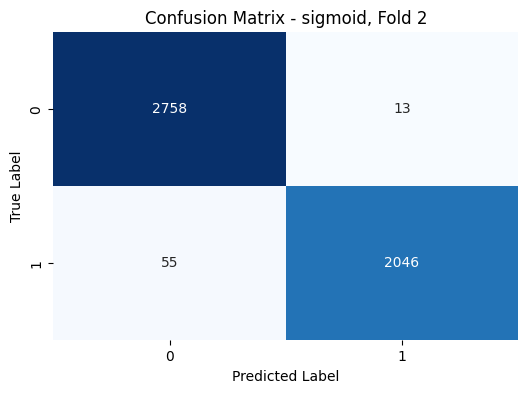

Fold [3], Epoch [100/3000], Loss: 0.6932462453842163
Fold [3], Epoch [200/3000], Loss: 0.6832208037376404
Fold [3], Epoch [300/3000], Loss: 0.6827730536460876
Fold [3], Epoch [400/3000], Loss: 0.6826462745666504
Fold [3], Epoch [500/3000], Loss: 0.6824955940246582
Fold [3], Epoch [600/3000], Loss: 0.6823006868362427
Fold [3], Epoch [700/3000], Loss: 0.6820271611213684
Fold [3], Epoch [800/3000], Loss: 0.6815977096557617
Fold [3], Epoch [900/3000], Loss: 0.6808186769485474
Fold [3], Epoch [1000/3000], Loss: 0.6791172027587891
Fold [3], Epoch [1100/3000], Loss: 0.6743555665016174
Fold [3], Epoch [1200/3000], Loss: 0.6569147706031799
Fold [3], Epoch [1300/3000], Loss: 0.5892137289047241
Fold [3], Epoch [1400/3000], Loss: 0.44728967547416687
Fold [3], Epoch [1500/3000], Loss: 0.32704731822013855
Fold [3], Epoch [1600/3000], Loss: 0.2480819970369339
Fold [3], Epoch [1700/3000], Loss: 0.19481922686100006
Fold [3], Epoch [1800/3000], Loss: 0.15742023289203644
Fold [3], Epoch [1900/3000], Loss

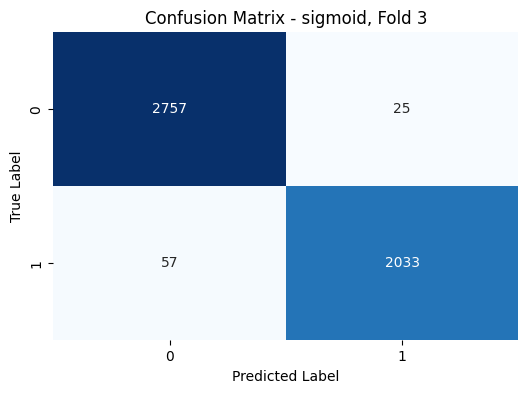

Fold [4], Epoch [100/3000], Loss: 0.6834129691123962
Fold [4], Epoch [200/3000], Loss: 0.6833170652389526
Fold [4], Epoch [300/3000], Loss: 0.6816107034683228
Fold [4], Epoch [400/3000], Loss: 0.6377782225608826
Fold [4], Epoch [500/3000], Loss: 0.4645572602748871
Fold [4], Epoch [600/3000], Loss: 0.3314654231071472
Fold [4], Epoch [700/3000], Loss: 0.2502615451812744
Fold [4], Epoch [800/3000], Loss: 0.19384494423866272
Fold [4], Epoch [900/3000], Loss: 0.15404504537582397
Fold [4], Epoch [1000/3000], Loss: 0.1263081282377243
Fold [4], Epoch [1100/3000], Loss: 0.10609224438667297
Fold [4], Epoch [1200/3000], Loss: 0.0912461206316948
Fold [4], Epoch [1300/3000], Loss: 0.0810825526714325
Fold [4], Epoch [1400/3000], Loss: 0.07394439727067947
Fold [4], Epoch [1500/3000], Loss: 0.06836698204278946
Fold [4], Epoch [1600/3000], Loss: 0.06458543986082077
Fold [4], Epoch [1700/3000], Loss: 0.061610762029886246
Fold [4], Epoch [1800/3000], Loss: 0.058778315782547
Fold [4], Epoch [1900/3000], L

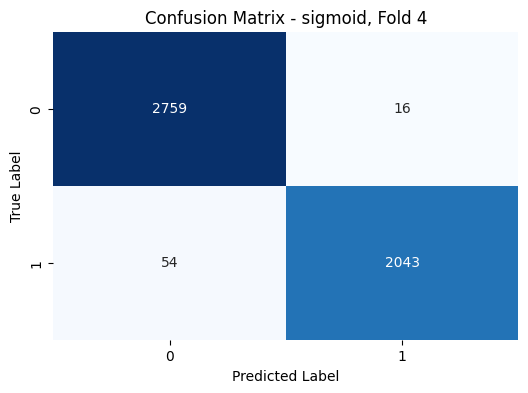

Fold [5], Epoch [100/3000], Loss: 0.682892918586731
Fold [5], Epoch [200/3000], Loss: 0.6828141212463379
Fold [5], Epoch [300/3000], Loss: 0.6814129948616028
Fold [5], Epoch [400/3000], Loss: 0.6462075114250183
Fold [5], Epoch [500/3000], Loss: 0.4831756055355072
Fold [5], Epoch [600/3000], Loss: 0.3440420627593994
Fold [5], Epoch [700/3000], Loss: 0.2606065273284912
Fold [5], Epoch [800/3000], Loss: 0.2036062479019165
Fold [5], Epoch [900/3000], Loss: 0.1625957041978836
Fold [5], Epoch [1000/3000], Loss: 0.1345757693052292
Fold [5], Epoch [1100/3000], Loss: 0.11512335389852524
Fold [5], Epoch [1200/3000], Loss: 0.10060525685548782
Fold [5], Epoch [1300/3000], Loss: 0.08902435004711151
Fold [5], Epoch [1400/3000], Loss: 0.08147349953651428
Fold [5], Epoch [1500/3000], Loss: 0.07515309751033783
Fold [5], Epoch [1600/3000], Loss: 0.06939166784286499
Fold [5], Epoch [1700/3000], Loss: 0.06502696126699448
Fold [5], Epoch [1800/3000], Loss: 0.06132405996322632
Fold [5], Epoch [1900/3000], L

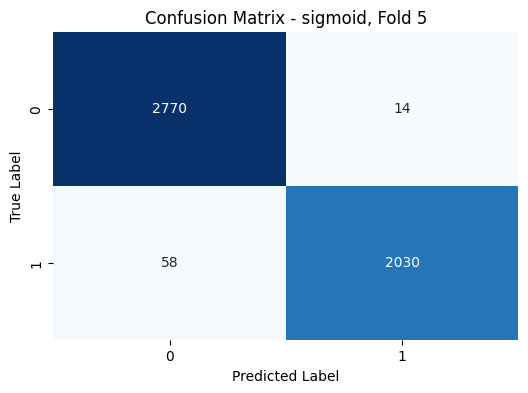

In [31]:
class ANN(nn.Module):
    def __init__(self, input_size, activation_func):
        super(ANN, self).__init__()
        self.fc0 = nn.Linear(input_size, 128)
        self.fc1 = nn.Linear(128, 96)
        self.fc2 = nn.Linear(96, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.activation_func = activation_func
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation_func(self.fc0(x))
        x = self.activation_func(self.fc1(x))
        x = self.activation_func(self.fc2(x))
        x = self.activation_func(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

# Initialize parameters
input_size = X_train_tfidf.shape[1]
activation_funcs = [torch.relu, torch.tanh, torch.sigmoid]  # List of activation functions to try
criterion = nn.BCELoss()
kf = KFold(n_splits=5)

# Cross-validation loop
for activation_func in activation_funcs:
    print(f"Training with {activation_func.__name__} activation function")

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_tfidf)):
        X_train_fold, X_val_fold = X_train_tfidf[train_idx], X_train_tfidf[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Initialize the model
        model = ANN(input_size, activation_func)
        optimizer = optim.Adam(model.parameters(), lr=0.0001)

        # Train the model
        epochs = 3000
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(X_train_fold)
            loss = criterion(outputs, y_train_fold.view(-1, 1))
            loss.backward()
            optimizer.step()
            if (epoch+1) % 100 == 0:  # Print loss every 100 epochs
                print(f"Fold [{fold+1}], Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")

        # Evaluate on the training set (train set of the current fold)
        with torch.no_grad():
            train_outputs = model(X_train_fold)
            train_preds = (train_outputs >= 0.5).float()

        # Confusion matrix
        cm = confusion_matrix(y_train_fold, train_preds)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix - {activation_func.__name__}, Fold {fold+1}")
        plt.show()

In [ ]:
#Test the data

In [32]:
test_df = pd.read_csv("/content/test.csv")

#clean the test dataset
test_df["text"] = test_df["text"].apply(data_clean)

X_test_tfidf = vectorizer.transform(test_df["text"])
X_test_tfidf = torch.tensor(X_test_tfidf.toarray(), dtype=torch.float32)

with torch.no_grad():
    test_outputs = model(X_test_tfidf)
    test_preds = (test_outputs >= 0.5).float()

test_df["target"] = test_preds.numpy()
test_df.to_csv("5CFV_cleaner_test_predictions.csv", index=False)
print("Predictions saved to 5CFV_cleaner_test_predictions.csv")

Predictions saved to 5CFV_cleaner_test_predictions.csv
